### NetID: my354

# Minimal neural network implementation

This is a "bare bones" implementation of a 2-layer neural network for classification, using rectified linear units as activation functions. The code is from Andrej Karpathy; please see [this page](http://cs231n.github.io/neural-networks-case-study/) for an annotated description of the code.

Your task in this part of the assigment is to extend this to a 3-layer network, and to experiment with some different settings of the parameters.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.facecolor'] = 'lightgray'

(-1.5, 1.5)

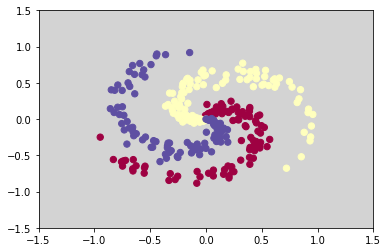

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

In [5]:
def train_linear_classifier(lambda_param=1e-3):
    # initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-0

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(200):
  
      # evaluate class scores, [N x K]
      scores = np.dot(X, W) + b 
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: average cross-entropy loss and regularization
      correct_logprobs = -np.log(probs[range(num_examples),y])
      data_loss = np.sum(correct_logprobs)/num_examples
      reg_loss = 0.5*lambda_param*np.sum(W*W)
      loss = data_loss + reg_loss
      if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters (W,b)
      dW = np.dot(X.T, dscores)
      db = np.sum(dscores, axis=0, keepdims=True)
  
      dW += lambda_param*W # regularization gradient
  
      # perform a parameter update
      W += -step_size * dW
      b += -step_size * db
    
    return W, b

W, b = train_linear_classifier(lambda_param=1e-3)

iteration 0: loss 1.096994
iteration 10: loss 0.931647
iteration 20: loss 0.872424
iteration 30: loss 0.847038
iteration 40: loss 0.834694
iteration 50: loss 0.828164
iteration 60: loss 0.824502
iteration 70: loss 0.822359
iteration 80: loss 0.821066
iteration 90: loss 0.820267
iteration 100: loss 0.819764
iteration 110: loss 0.819442
iteration 120: loss 0.819234
iteration 130: loss 0.819099
iteration 140: loss 0.819009
iteration 150: loss 0.818950
iteration 160: loss 0.818911
iteration 170: loss 0.818885
iteration 180: loss 0.818867
iteration 190: loss 0.818856


In [6]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.3850693285424291, 1.4049306714575527)

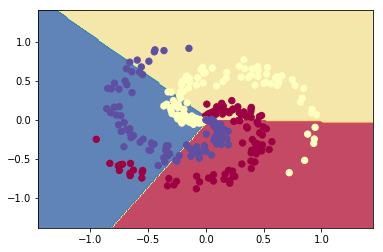

In [7]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


In [8]:
def train_2_layer_network(H1=100, lambda_param=1e-03):
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = 0.01 * np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = 0.01 * np.random.randn(H1,K)
    b2 = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(20000):
  
      # evaluate class scores, [N x K]
      hidden_layer = np.maximum(0, np.dot(X, W1) + b1) # note, ReLU activation
      scores = np.dot(hidden_layer, W2) + b2
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: average cross-entropy loss and regularization
      correct_logprobs = -np.log(probs[range(num_examples),y])
      data_loss = np.sum(correct_logprobs)/num_examples
      reg_loss = 0.5*lambda_param*np.sum(W1*W1) + 0.5*lambda_param*np.sum(W2*W2)
      loss = data_loss + reg_loss
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW2 = np.dot(hidden_layer.T, dscores)
      db2 = np.sum(dscores, axis=0, keepdims=True)
      # next backprop into hidden layer
      dhidden = np.dot(dscores, W2.T)
      # backprop the ReLU non-linearity
      dhidden[hidden_layer <= 0] = 0
      # finally into W,b
      dW1 = np.dot(X.T, dhidden)
      db1 = np.sum(dhidden, axis=0, keepdims=True)
  
      # add regularization gradient contribution
      dW2 += lambda_param * W2
      dW1 += lambda_param * W1
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2

    return W1, b1, W2, b2


W1, b1, W2, b2 = train_2_layer_network(100, lambda_param=1e-4)

iteration 0: loss 1.098610
iteration 1000: loss 0.752481
iteration 2000: loss 0.668412
iteration 3000: loss 0.483893
iteration 4000: loss 0.346535
iteration 5000: loss 0.262675
iteration 6000: loss 0.209540
iteration 7000: loss 0.174794
iteration 8000: loss 0.153109
iteration 9000: loss 0.138693
iteration 10000: loss 0.128047
iteration 11000: loss 0.118924
iteration 12000: loss 0.112105
iteration 13000: loss 0.107208
iteration 14000: loss 0.103091
iteration 15000: loss 0.099937
iteration 16000: loss 0.097410
iteration 17000: loss 0.095353
iteration 18000: loss 0.093662
iteration 19000: loss 0.092135


In [9]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8850693285424291, 1.4149306714575494)

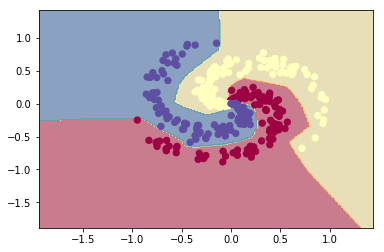

In [10]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## (b) Extend the code from two layers to three layers (15 points)

Run the code provided in the notebook minimal neural network.ipynb and inspect it to be sure you understand how it works. (We did this in class!) Then, after working out the derivatives in part (a) above, extend the code by writing a function that implements a 3-layer version. Your function declaration should look like this:
```python
def train_3_layer_network(H1=100, H2=100, lambda_param=1e-03)
```    
where H1 is the number of hidden units in the first layer, and H2 is the number of hidden units in the second layer. Then train a 3-layer network and display the classification results in your notebook, as is done for the 2-layer network in the starter code.

In [11]:
def train_3_layer_network(H1=100, H2=100, lambda_param=1e-03):
    np.random.seed(0)
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = 0.01 * np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = 0.01 * np.random.randn(H1,H2)
    b2 = np.zeros((1,H2))
    W3 = 0.01 * np.random.randn(H2,K)
    b3 = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(20000):
  
      # evaluate class scores, [N x K]
      hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) #layer 1: ReLU(W1x + b1)
      hidden_layer2 = np.maximum(0, np.dot(hidden_layer1,W2) + b2) #layer 2: ReLU(W2h1 + b2)
      scores = np.dot(hidden_layer2, W3) + b3 #input to layer 3: W3h2 + b3, we enter this into the softmax below
  
      # compute the class probabilities, softmax output layer (layer 3)
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: average cross-entropy loss and regularization
      correct_logprobs = -np.log(probs[range(num_examples),y])
      data_loss = np.sum(correct_logprobs)/num_examples
      reg_loss = 0.5*lambda_param*np.sum(W1*W1) + 0.5*lambda_param*np.sum(W2*W2)
      loss = data_loss + reg_loss
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
   
      # Here is where I need to add dW3 and db3 code
      dW3 = np.dot(hidden_layer2.T,dscores)
      db3 = np.sum(dscores, axis=0, keepdims=True)
      dhidden2 = np.dot(dscores,W3.T)
      dhidden2[hidden_layer2 <= 0] = 0  
    
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW2 = np.dot(hidden_layer1.T, dhidden2)
      db2 = np.sum(dhidden2, axis=0, keepdims=True)
      # next backprop into hidden layer1
      # Notice that dhidden1 is W2T*dhidden2 where dhidden2 is the W3T*dscores. Remember the ReLU activation. 
      dhidden1 = np.dot(dhidden2, W2.T)
      # backprop the ReLU non-linearity
      dhidden1[hidden_layer1 <= 0] = 0
      # finally into W1,b1
      dW1 = np.dot(X.T, dhidden1)
      db1 = np.sum(dhidden1, axis=0, keepdims=True)
  
      # add regularization gradient contribution
      dW3 += lambda_param * W3
      dW2 += lambda_param * W2
      dW1 += lambda_param * W1
      
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2
      W3 += -step_size * dW3
      b3 += -step_size * db3  

    return W1, b1, W2, b2, W3, b3


W1, b1, W2, b2, W3, b3 = train_3_layer_network(100, 100, lambda_param=1e-3)

iteration 0: loss 1.099108
iteration 1000: loss 1.097493
iteration 2000: loss 0.716299
iteration 3000: loss 0.350104
iteration 4000: loss 0.147875
iteration 5000: loss 0.119893
iteration 6000: loss 0.111840
iteration 7000: loss 0.108488
iteration 8000: loss 0.106522
iteration 9000: loss 0.105095
iteration 10000: loss 0.104246
iteration 11000: loss 0.103640
iteration 12000: loss 0.103146
iteration 13000: loss 0.102722
iteration 14000: loss 0.102343
iteration 15000: loss 0.102007
iteration 16000: loss 0.101695
iteration 17000: loss 0.101373
iteration 18000: loss 0.100985
iteration 19000: loss 0.100682


In [17]:
b2

array([[ 3.73199821e-01,  8.46527609e-03,  1.86957668e-01,
        -8.46386099e-02,  6.11029371e-01,  4.62115718e-01,
        -2.67608787e-03,  0.00000000e+00,  5.72460475e-01,
         2.98661935e-01, -4.26243713e-03,  2.88808086e-01,
        -1.85752560e-04, -1.25121701e-05,  1.61984077e-01,
        -2.50814411e-06,  5.57163036e-01,  6.33753364e-03,
         1.80251058e-01, -1.05614368e-02,  2.14047725e-01,
         6.60485782e-04,  1.72632446e-01,  2.23882229e-01,
         1.03612039e-01,  2.66415270e-01,  1.84037405e-01,
         3.44561467e-01,  2.96119137e-01,  2.73860910e-01,
         5.05990546e-01,  4.63523371e-01, -3.69477495e-05,
         2.81784181e-01, -1.38535722e-03,  5.35468858e-04,
        -1.39938979e-02, -2.97533080e-03,  2.46425245e-01,
         3.17371020e-01,  2.04383232e-01, -2.68101087e-04,
         3.96000201e-01,  4.75883891e-01,  9.06492629e-02,
         1.30613426e-01, -1.39689140e-02, -2.48711747e-02,
         5.24334428e-02,  4.18661919e-02,  3.81873573e-0

In [14]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8850693285424291, 1.4149306714575494)

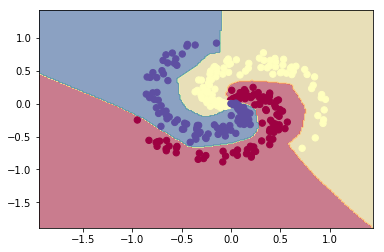

In [87]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.dot(np.maximum(0,Z),W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Extra credit (7 points)

As extra credit, make the code more modular and write a function to implement a general multilayer network:

```python
def train_multi_layer_network(H=[100, 100], lambda_param=1e-03):
    # initialize parameters randomly
    # Note that H is a vector of hidden layers, assume the first entry is H1, 2nd is H2, etc.
    test = [D,H,K]
    dims = np.hstack(test) #We have array of dimensions
    layers = len(H) + 1 #number of layers is number of hidden layers plus 1
    #define empty arrays for each of the 
    Ws = np.empty(layers)
    bs = np.empty(layers)
    for i in range(layers):
        Ws[i] = 0.01 * np.randn(dims[i],dims[i+1])
        bs[i] = np.zeros((1,dims[i+1]))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    
    #define hidden_layer array
    hidden_layers = np.hstack(X,np.empty(len(H)))
    
    for i in range(20000):
        for j in range(len(hidden_layers)):
            hidden_layers[j] = np.maximum(np.dot(hidden_layers[j]))

#------------------------------------------- This is how far I have gotten so far, still working...

          # evaluate class scores, [N x K]
          hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1) #layer 1: ReLU(W1x + b1)
          hidden_layer2 = np.maximum(0, np.dot(hidden_layer1,W2) + b2) #layer 2: ReLU(W2h1 + b2)
          scores = np.dot(hidden_layer2, W3) + b3 #input to layer 3: W3h2 + b3, we enter this into the softmax below

          # compute the class probabilities, softmax output layer (layer 3)
          exp_scores = np.exp(scores)
          probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

          # compute the loss: average cross-entropy loss and regularization
          correct_logprobs = -np.log(probs[range(num_examples),y])
          data_loss = np.sum(correct_logprobs)/num_examples
          reg_loss = 0.5*lambda_param*np.sum(W1*W1) + 0.5*lambda_param*np.sum(W2*W2)
          loss = data_loss + reg_loss
          if i % 1000 == 0:
            print("iteration %d: loss %f" % (i, loss))

          # compute the gradient on scores
          dscores = np.array(probs)
          dscores[range(num_examples),y] -= 1
          dscores /= num_examples

          # Here is where I need to add dW3 and db3 code
          dW3 = np.dot(hidden_layer2.T,dscores)
          db3 = np.sum(dscores, axis=0, keepdims=True)
          dhidden2 = np.dot(dscores,W3.T)
          dhidden2[hidden_layer2 <= 0] = 0  

          # backpropate the gradient to the parameters
          # first backprop into parameters W2 and b2
          dW2 = np.dot(hidden_layer1.T, dhidden2)
          db2 = np.sum(dhidden2, axis=0, keepdims=True)
          # next backprop into hidden layer1
          # Notice that dhidden1 is W2T*dhidden2 where dhidden2 is the W3T*dscores. Remember the ReLU activation. 
          dhidden1 = np.dot(dhidden2, W2.T)
          # backprop the ReLU non-linearity
          dhidden1[hidden_layer1 <= 0] = 0
          # finally into W1,b1
          dW1 = np.dot(X.T, dhidden1)
          db1 = np.sum(dhidden1, axis=0, keepdims=True)

          # add regularization gradient contribution
          dW3 += lambda_param * W3
          dW2 += lambda_param * W2
          dW1 += lambda_param * W1


          # perform a parameter update
          W1 += -step_size * dW1
          b1 += -step_size * db1
          W2 += -step_size * dW2
          b2 += -step_size * db2
          W3 += -step_size * dW3
          b3 += -step_size * db3  

    return W1, b1, W2, b2, W3, b3
```

## (c) Experiment with different parameter settings (10 points)

Now experiment with different network configurations and training parameters. For example, you can train models with different numbers of hidden nodes H1 and H2, and different settings of the regularization parameter lambda param. Train at least three and no more than five networks. For each network, display the decision boundaries on the training data, and include a Markdown cell that describes its behavior relative to the other networks you train. Specifically, comment on how the different settings of the parameters change the bias and variance of the fitted model.

In [90]:
#Experiment 1 -  H1 nodes = 2
W1, b1, W2, b2, W3, b3 = train_3_layer_network(2, 100, lambda_param=1e-3)

iteration 0: loss 1.098622
iteration 1000: loss 1.098582
iteration 2000: loss 1.096767
iteration 3000: loss 0.917112
iteration 4000: loss 0.900106
iteration 5000: loss 0.716199
iteration 6000: loss 0.480435
iteration 7000: loss 0.423140
iteration 8000: loss 0.390080
iteration 9000: loss 0.357459
iteration 10000: loss 0.323361
iteration 11000: loss 0.293989
iteration 12000: loss 0.239675
iteration 13000: loss 0.203342
iteration 14000: loss 0.190109
iteration 15000: loss 0.178949
iteration 16000: loss 0.169559
iteration 17000: loss 0.166173
iteration 18000: loss 0.158133
iteration 19000: loss 0.153248


In [91]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.97


(-1.8850693285424291, 1.4149306714575494)

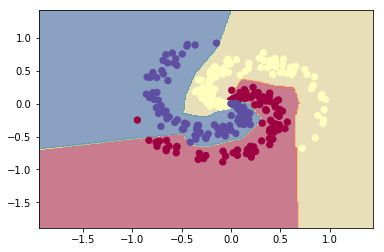

In [92]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.dot(np.maximum(0,Z),W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Experiment 1: Less nodes for H1

If we only use 2 nodes in the first layer (and keep the other paramters constant), we still see 97% training accuracy. The decision boundaries are less smooth (more linear) and so more points are being misclassified. Our classifier is less accurate, so bias has increased. However, by reducing the number of hidden nodes, we prevent our classifier from over-fitting the data, thus decreasing variance. Now random changes in the data will have a less signficant outcome on our error. We can compare this to the original linear classifier (no hidden units at all), where we saw that it had high bias, but data variation would not increase the error much (low cariance).

In [100]:
#Experiment 2 - H2 nodes = 2
W1, b1, W2, b2, W3, b3 = train_3_layer_network(100, 2, lambda_param=1e-3)

iteration 0: loss 1.098632
iteration 1000: loss 1.098628
iteration 2000: loss 1.098625
iteration 3000: loss 1.098617
iteration 4000: loss 1.098589
iteration 5000: loss 1.097790
iteration 6000: loss 0.919944
iteration 7000: loss 0.697865
iteration 8000: loss 0.267566
iteration 9000: loss 0.155778
iteration 10000: loss 0.126599
iteration 11000: loss 0.117625
iteration 12000: loss 0.113593
iteration 13000: loss 0.111312
iteration 14000: loss 0.109905
iteration 15000: loss 0.108869
iteration 16000: loss 0.108172
iteration 17000: loss 0.107634
iteration 18000: loss 0.107196
iteration 19000: loss 0.106817


In [101]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8850693285424291, 1.4149306714575494)

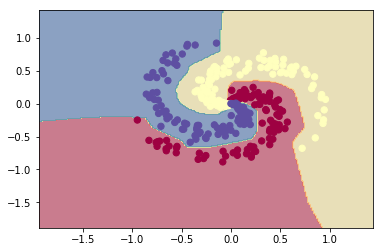

In [102]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.dot(np.maximum(0,Z),W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Experiment 2: Less nodes for H2

Again we hold everything else equal, but reduce the number of H2 nodes to 2. We see a higher training accuracy at 99% and smoother classifier compared to experiment 1, but still less smooth then with 100 nodes in each layer. Again, by reducing the number of hidden layer nodes, we are increasing bias and reducing variance in our classifier. However, since this is just training data, our classifier still learns the data very well and we have low bias. We would see higher bias if we were to fit on test data. Note that computing a classifier with fewer nodes takes less time, again because it is not over-learning (over-fitting) the data.

In [96]:
#Experiment 3 - H1 and H2 nodes = 5
W1, b1, W2, b2, W3, b3 = train_3_layer_network(5, 5, lambda_param=1e-3)

iteration 0: loss 1.098614
iteration 1000: loss 1.098613
iteration 2000: loss 1.098611
iteration 3000: loss 1.098609
iteration 4000: loss 1.098603
iteration 5000: loss 1.098573
iteration 6000: loss 1.097343
iteration 7000: loss 0.766983
iteration 8000: loss 0.632543
iteration 9000: loss 0.577344
iteration 10000: loss 0.557127
iteration 11000: loss 0.498472
iteration 12000: loss 0.436101
iteration 13000: loss 0.410692
iteration 14000: loss 0.222851
iteration 15000: loss 0.160271
iteration 16000: loss 0.149536
iteration 17000: loss 0.145382
iteration 18000: loss 0.143422
iteration 19000: loss 0.139942


In [97]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.8850693285424291, 1.4149306714575494)

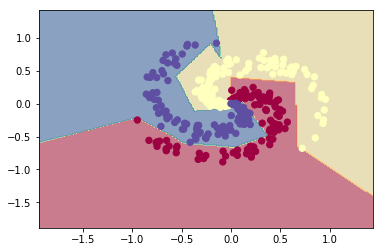

In [98]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.dot(np.maximum(0,Z),W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Experiment 3 - H1 and H2 both have 5 nodes

Even with only 5 nodes in each hidden layer, our classifier is extremely accurate at 98%. However, clearly these are much more linear boundaries and not very smooth. By dropping the number of hidden nodes to 10, we have trained a classifier that does not over-fit the data and thus has high bias but low variance. This is the same result as above, but it is remarkable to see that it is still learns to classify the points so well with only 10 nodes compared to 200 in the initial problem.

In [159]:
#Experiment 4 - Increasing lambda
W1, b1, W2, b2, W3, b3 = train_3_layer_network(100, 100, lambda_param=1e-02)

iteration 0: loss 1.103588
iteration 1000: loss 1.099285
iteration 2000: loss 1.098709
iteration 3000: loss 1.098627
iteration 4000: loss 1.098614
iteration 5000: loss 1.098613
iteration 6000: loss 1.098612
iteration 7000: loss 1.098612
iteration 8000: loss 1.098612
iteration 9000: loss 1.098612
iteration 10000: loss 1.098612
iteration 11000: loss 1.098612
iteration 12000: loss 1.098612
iteration 13000: loss 1.098612
iteration 14000: loss 1.098612
iteration 15000: loss 1.098612
iteration 16000: loss 1.098612
iteration 17000: loss 1.098612
iteration 18000: loss 1.098612
iteration 19000: loss 1.098612
iteration 20000: loss 1.098612
iteration 21000: loss 1.098612
iteration 22000: loss 1.098612
iteration 23000: loss 1.098612
iteration 24000: loss 1.098612
iteration 25000: loss 1.098612
iteration 26000: loss 1.098612
iteration 27000: loss 1.098612
iteration 28000: loss 1.098612
iteration 29000: loss 1.098612


In [163]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W1) + b1)
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2)
scores = np.dot(hidden_layer2, W3) + b3
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.33


(-1.8850693285424291, 1.4149306714575494)

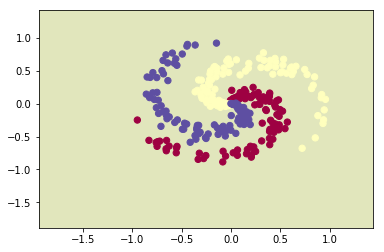

In [161]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.dot(np.maximum(0,Z),W3) + b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Experiment 4 - Increasing lambda regularization penalty

Here, we return to 100 nodes in each hidden layer, but change the lambda parameter from 0.001 to 0.01. Thus we are increasingly the penalty on the weights (W1 and W2). Thus, the magnitude of the weights are forced to shrink and the model is less flexible to the data. Changing the lambda penalty by a factor of 10 provides an extreme case, but illustrates the effects clearly. Here, all points are classified as yellow, so the bias of the classifier has increased, but the variance has decreased. Random changes in the data will not change the error if everything is being classified as yellow (no variance), however our classifier is clearly not very good and thus has high bias.

### General comparison on 2-layer network to 3-layer network

By adding an additional layer, the classifier becomes more smooth because it is better fitting the data. Because we have a better classifier, the bias is decreasing. However, it is possible we are beginning to overfit our data and thus increasing the variance of our model. If we were to continue adding layers to the model, we would likely get a very strong model on the training data, but would have poor classification rate on test data where there are slight random differences in the data. This inability to adapt with random differences is the higher variance of the model.